# SIT744 Assignment 1: Image Classification with Deep Feedforward Neural Network

<div class="alert-info">
    <p>Due: <strong>8pm 24 August 2020</strong>  (Monday)</p>


This is an <strong>individual</strong> assignment. It contributes <strong>30%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[219588252]_assignment1_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[219588252]_assingment1_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment1_solution.ipynp </li>
<li> 123456_assignment1_output.html</li>
</ul>
</p>

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective



This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.

In this assignment, you are going to work with the Fashion-MNIST dataset for image recognition. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples in the visualization task below. 

This assignment consists of five tasks.


## Task 1 Load the data

*(weight ~5%)*

Load the Fashion MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). You may get the data via Keras (keras.datasets) or Tensorflow Datasets (tfds). 

In [ ]:
#Importing necessary files
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import pathlib
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [ ]:
#Loading the data
from tensorflow.keras.datasets import mnist
Fdata = keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = Fdata.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Task 2 Understand the data

*(weight ~15%)*



Display 100 images from the train set in the form of 10x10 matrix.

Answer the following questions:

1. What are the unique labels in this dataset?
2. How many training images and how many test images?
3. What is the size of each image?
4. Find out the numeric range of the input. Do we need to rescale the input?
5. In our problem, what are the shapes of input tensors and target tensors? Do you need to reshape the input?


The 10x10 Matrix


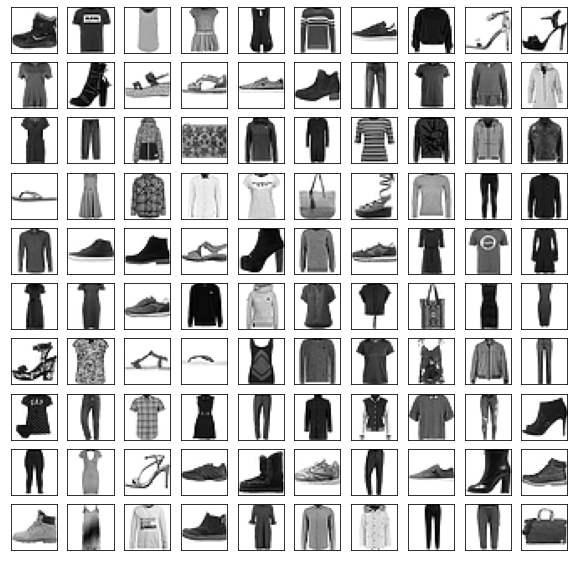

In [ ]:
#DISPLAYING THE 10x10 MATRIX
import matplotlib.pyplot as plt

print("The 10x10 Matrix")
figure = plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i],cmap='binary')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


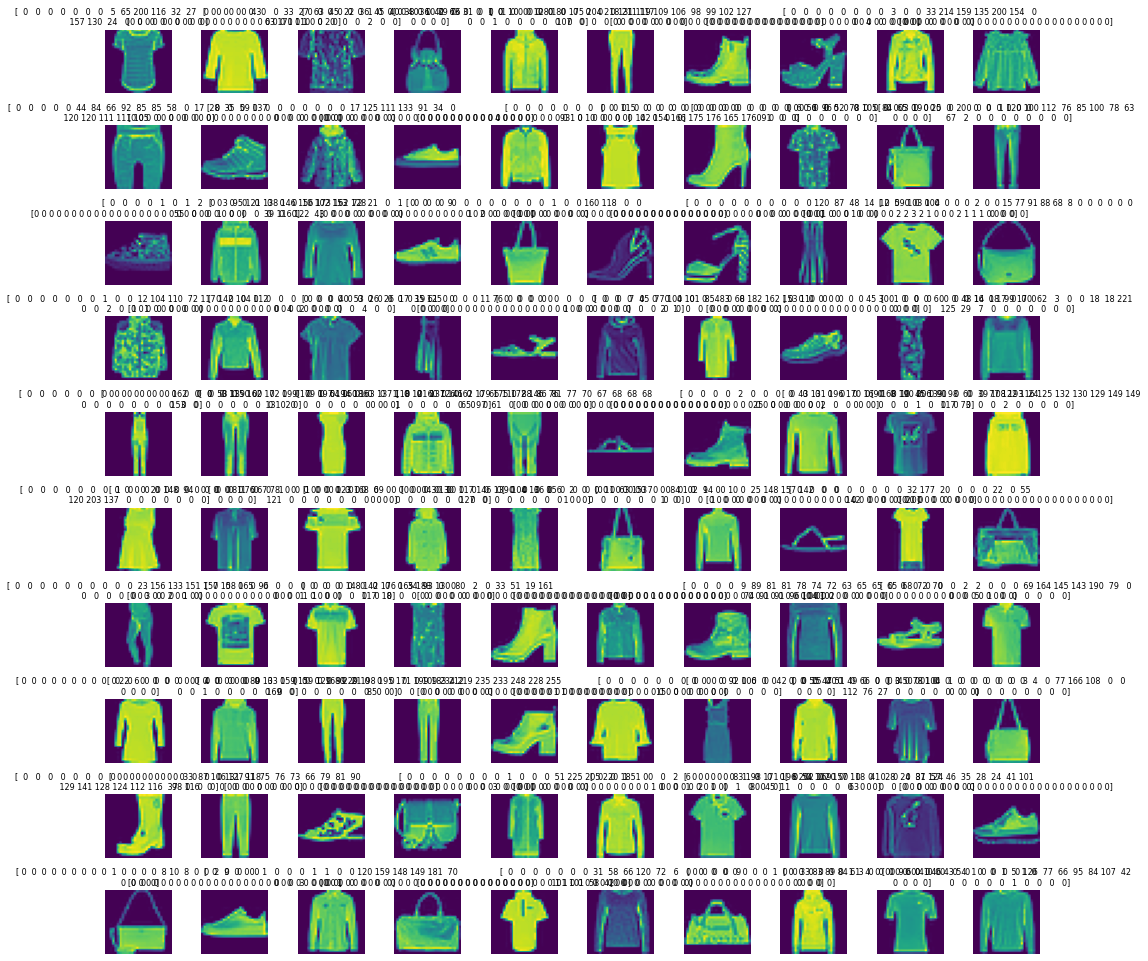

In [ ]:
WGR = 10
LGR = 10

fig, axes = plt.subplots(LGR, WGR, figsize=(17,17))

axes = axes.ravel()
n = len(train_img)

for i in np.arange(100):
    
    ind = np.random.randint(0, n)

    axes[i].imshow(train_img[ind, 1:])

    axes[i].set_title(train_img[ind, 0], fontsize=8)

    axes[i].axis('off')

    plt.subplots_adjust(hspace=0.5)

In [ ]:
#Counting the unique labels
np.unique(train_lbl)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Training & Testing images 

print("There are ",len(train_img),"training img and ", len(test_img), "test images")

There are  60000 training img and  10000 test images


In [ ]:
#Calculating the Size of each image 
print("The size for each train image",train_img[1].shape)
print("The size for each test image", test_img[1].shape)

The size for each train image (28, 28)
The size for each test image (28, 28)


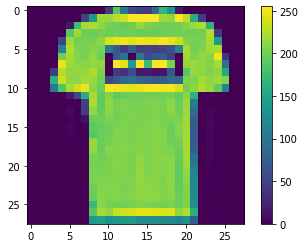

In [ ]:
#Plotting image
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)
plt.ticklabel_format(axis='y',style='plain',useOffset=False)
plt.show()

From the image,we can observe the image pixel values ranging from 0 to 255 & hence we need to rescale the input so input range lies between 0 to 1,upon rescaling this image & dividing each pixel by 255

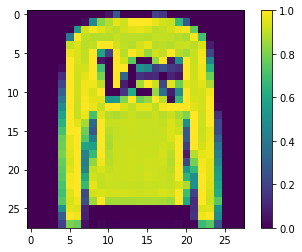

In [ ]:
#Calculating numeric output

#Rescalling the training image
re_train_img = train_img.astype('float32') / 255

#Rescaling the testing image
re_test_img = test_img.astype('float32') / 255.0

#Rescaled image
plt.figure()
plt.imshow(re_test_img[1])
plt.colorbar()
plt.grid(False)
plt.ticklabel_format(axis='y',style='plain',useOffset=False)
plt.show()

In [ ]:
#Shapes & input tensors
print(f"Target tester (10,) & Shape of input tester {keras.backend.flatten(re_train_img[1]).numpy().shape}. To fit the model,we need to flatten the images")

Target tester (10,) and Shape of input tester (784,). To fit the model,we need to flatten the images


## Task 3 Construct an input pipeline

*(weight ~15%)*

Creat train/validate/test data splits and construct tf.data pipelines. Make sure that the training data is batched.


In [ ]:
#Loading Data
train, test = keras.datasets.fashion_mnist.load_data()

#Constructing data pipeline
def pipeline(dataset):
  pics, lab = dataset
  pics = pics/255.0
  pics = pics.reshape(len(pics), 28*28)
  lab = keras.utils.to_categorical(lab.astype(np.int32))
  return tf.data.Dataset.from_tensor_slices((pics, lab))

#Batching train set
pic_batches = pipeline(train).shuffle(10000).batch(512, drop_remainder=True)

#Spliting the data for validation
pic_validation = pipeline(test).take(1000).batch(1000)
pic_test = pipeline(test).skip(1000).batch(9000)

print(pic_batches)

<BatchDataset shapes: ((512, 784), (512, 10)), types: (tf.float64, tf.float32)>


## Task 4 Construct a deep forward neural network

*(weight ~35%)*

### Task 4.1 Setting up a model for training

Construct a deep feedforward neural network. You need to decide and report the following configurations:

- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
- The loss function
- The metrics for model evaluation (which may be different from the loss function)
- The optimiser

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tools.

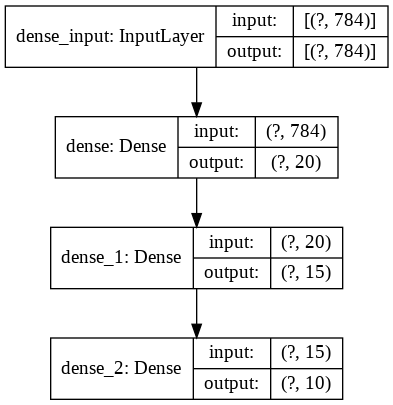

In [ ]:
#Model Construction

model = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)


### Task 4.2 Fitting the model

Now fit the model. Decide and report the following training setting:

1. The training batch size
2. The number of training epochs (at least 1,000 epochs recommended)
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Plot the training and validation loss and accuracy. Answer the following questions:

1. Do you see overfitting or underfitting? Why?
2. If you see overfitting, at which epoch did it happen?

In [ ]:

epochs = 1000

print('Training Initializing.')
hist1 = model.fit(pic_batches, epochs = epochs, validation_data = pic_validation, 
                      verbose=0)
print('Training Initializaed.')

Training Initializing.
Training Initializaed.


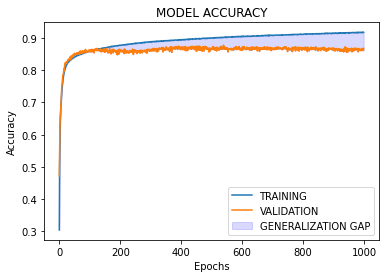

In [ ]:
#Checking accuracy
import matplotlib.pyplot as plt


# Plot accuracy
plt.plot(hist1.history['accuracy'], label="TRAINING")
plt.plot(hist1.history['val_accuracy'], label="VALIDATION")
plt.fill_between(list(range(epochs)),hist1.history['accuracy'], hist1.history['val_accuracy'], 
                 label='GENERALIZATION GAP', color='blue', alpha=.15)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Task 4.3 Check the convergence through gradient

Use  TensorBoard to check the gradients. 

- Do you see vanishing or exploding gradients?
- Use the gradient norm to check if the training has converged to a local minimum.

Show screenshots of your TensorBoard output.

In [ ]:
#Writing customer loops & Tracking it with tesorboard

from datetime import datetime
import os
directory = "logs"
id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(directory, id)

model1 = keras.models.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(784,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])


loss1 = tf.keras.losses.CategoricalCrossentropy()
def loss(model1, x, y):
  y_ = model1(x)
  return loss1(y_true=y, y_pred=y_)


def grad(model1, inputs, targets):
  with tf.GradientTape() as tape:
    valloss = loss(model1, inputs, targets)
  return valloss, tape.gradient(valloss, model.trainable_variables)


optimizer1 = tf.keras.optimizers.RMSprop()


epochs_count = 2001

!rm -rf ./logs/ 
writer = tf.summary.create_file_writer(logdir = logdir)
with writer.as_default():
  for epoch in range(epochs_count):
    average_lossEpoch = tf.keras.metrics.Mean()
    average_lossValidation = tf.keras.metrics.Mean()
    average_lossGradients = [tf.keras.metrics.MeanTensor() for var in  model1.variables]
    
    for (x, y), (val_x, val_y) in tf.data.Dataset.zip((pic_batches, pic_validation)):
      with tf.GradientTape() as tape:
        value_loss = loss(model1, x, y)
        gradient_1 = tape.gradient(value_loss, model1.trainable_variables)
      loss_val = loss(model1, val_x, val_y)
      optimizer1.apply_gradients(zip(gradient_1, model1.trainable_variables))
      for i, gradient in enumerate(gradient_1):
        average_lossGradients[i].update_state(gradient)
      average_lossEpoch.update_state(value_loss)   
      average_lossValidation.update_state(loss_val)
    

    for i, gradient in enumerate(average_lossGradients):
      tf.summary.histogram("gradients/" + model1.variables[i].name, gradient.result(), step=epoch)
      tf.summary.scalar('Gradient Norm/' + model1.variables[i].name, 
                        tf.math.sqrt(tf.math.maximum(tf.math.reduce_sum(gradient.result()**2), 1e-12)), step=epoch)  
    
    tf.summary.scalar('Training_Loss', average_lossEpoch.result(), step=epoch)
    tf.summary.scalar('Validation_Loss', average_lossValidation.result(), step=epoch)
    writer.flush()
    
    if epoch % 200 == 0:
      print("Epoch {:03d}: Loss: {:.3f}, Validation_loss  {:.3f}".format(epoch, 
                                                                         average_lossEpoch.result(), 
                                                                         average_lossValidation.result()))

Epoch 000: Loss: 2.374, Validation_loss  2.371
Epoch 200: Loss: 0.461, Validation_loss  0.509
Epoch 400: Loss: 0.238, Validation_loss  0.492
Epoch 600: Loss: 0.198, Validation_loss  0.533
Epoch 800: Loss: 0.229, Validation_loss  0.642
Epoch 1000: Loss: 0.095, Validation_loss  0.597
Epoch 1200: Loss: 0.030, Validation_loss  0.667
Epoch 1400: Loss: 0.069, Validation_loss  0.624
Epoch 1600: Loss: 0.058, Validation_loss  0.766
Epoch 1800: Loss: 0.418, Validation_loss  1.060
Epoch 2000: Loss: 0.015, Validation_loss  0.787


## Task 5 Fine-tuning the model

*(weight ~30%)*

You may see above that your model is overfitting. There are multiple things you can do. Below are some options:

1. Add dropout
2. Add Batch Normalisation
3. Add layer-specific weight regularizations
4. Change the learning rate

Apply different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

Run **five or more** experiments of different training configurations and record the test accuracy achieved in the Markdown table below. You may modify the table heading to match your experiment design.



|Dropout (rate)   | Batch Normalisation (Y/N)  | Optimiser  | Learning Rate  | Number of Epochs   |  Test Accuracy |
|---|---|---|---|---|---|
|   |   |   |   |   |   |
|   |   |   |   |   |   |
|   |   |   |   |   |   |



Answer the following questions:

1. Which configuration achieved the best test accuracy?
2. Which setting had the most impact and which one had the least impact?

In [ ]:
#Fine tuning
epochs = 100

# Experiment 1
print("Adding dropout of 0.3")
modelLayer = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

modelLayer.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

hist_2 = modelLayer.fit(pic_batches, epochs=epochs, validation_data=pic_validation, 
                      verbose=0)
modelLayer.evaluate(pic_test)

# Experiment 2
print("Adding dropout of 0.3 with Batch Normalization")
modelLayer = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

modelLayer.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

hist_2 = modelLayer.fit(pic_batches, epochs=epochs, validation_data=pic_validation, 
                      verbose=0)
modelLayer.evaluate(pic_test)

# Experiment 3 
print("Adding dropout of 0.5 with Batch Normalization and RMSProp Optimizer (lr=.1)")
modelLayer = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

modelLayer.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

hist_2 = modelLayer.fit(pic_batches, epochs=epochs, validation_data=pic_validation, 
                      verbose=0)
modelLayer.evaluate(pic_test)

# Experiment 4:
print("Adding dropout of 0.3 with Batch Normalization and Adam Optimizer (initial lr=.1)")
modelLayer = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

modelLayer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

hist_2 = modelLayer.fit(pic_batches, epochs=epochs, validation_data=pic_validation, 
                      verbose=0)
modelLayer.evaluate(pic_test)

# Experiment 5 
print("Adding dropout of 0.3 and L2 regularizer in hidden layer ")
modelLayer = keras.models.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax')])

modelLayer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

hist_2 = modelLayer.fit(pic_batches, epochs=epochs, validation_data=pic_validation, 
                      verbose=0)
modelLayer.evaluate(pic_test)

#

Adding dropout of 0.3
1/1 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8408
Adding dropout of 0.3 with Batch Normalization
1/1 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8366
Adding dropout of 0.5 with Batch Normalization and RMSProp Optimizer (lr=.1)
1/1 [==============================] - 0s 2ms/step - loss: 1.1031 - accuracy: 0.5673
Adding dropout of 0.3 with Batch Normalization and Adam Optimizer (initial lr=.1)
1/1 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7696
Adding dropout of 0.3 and L2 regularizer in hidden layer 
1/1 [==============================] - 0s 2ms/step - loss: 1.7484 - accuracy: 0.1998


[1.748352289199829, 0.1997777819633484]

Most accurate was experiment 1.
As we can see,Dropout 0.3 which is experiment 1,which makes it the most accurate experiment,& experiment 5 has the least impact

## Task 6 Generate HTML output

Use *nbconvert* to convert your completed notebook into an HTML file and name it **[YourID]_assingment1_output.html**.

In [ ]:
#Converting python notebook to html
!pip install nbconvert
! jupyter nbconvert --to html 219296087_assignment1_solution.ipynb

[NbConvertApp] WARNING | pattern u'219296087_assignment1_solution.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'


---
**END OF ASSIGNMENT ONE**

